In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import time

print('Done')

Done


In [5]:
past_traj = torch.load('data/past.pt', map_location=torch.device('cpu'))
fut_traj = torch.load('data/future.pt', map_location=torch.device('cpu'))

traj = torch.cat((past_traj, fut_traj), dim=2) * 94 / 28

prediction = torch.load('data/prediction.pt', map_location=torch.device('cpu'))
prediction = (prediction * 5 + past_traj[:, :, -1:].contiguous().view(-1, 1, 2)[:, None]) * 94 / 28


mean = torch.load('data/p_mean_denoise.pt', map_location=torch.device('cpu'))[:, 0]
mean = (mean * 5 + past_traj[:, :, -1:].contiguous().view(-1, 1, 2)) * 94 / 28

sigma = torch.load('data/p_sigma.pt', map_location=torch.device('cpu'))
sigma = torch.exp(sigma/2)

In [6]:
court = plt.imread("court.png")
mask = np.zeros_like(court)

class Constant:
    """A class for handling constants"""
    NORMALIZATION_COEF = 7
    PLAYER_CIRCLE_SIZE = 12 / NORMALIZATION_COEF
    INTERVAL = 10
    DIFF = 6
    X_MIN = 0
    X_MAX = 100
    Y_MIN = 0
    Y_MAX = 50
    COL_WIDTH = 0.3
    SCALE = 1.65
    FONTSIZE = 6
    X_CENTER = X_MAX / 2 - DIFF / 1.5 + 0.10
    Y_CENTER = Y_MAX - DIFF / 1.5 - 0.35

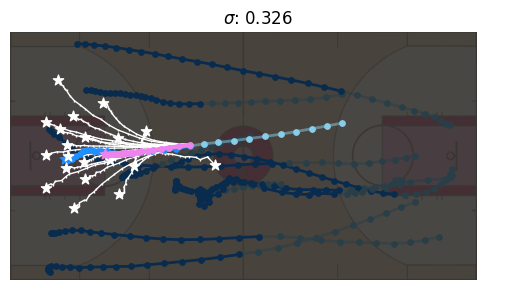

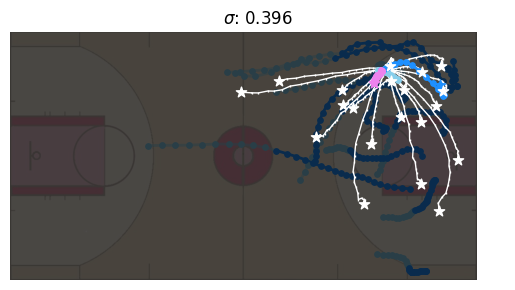

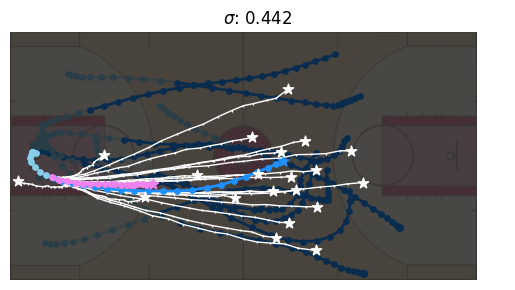

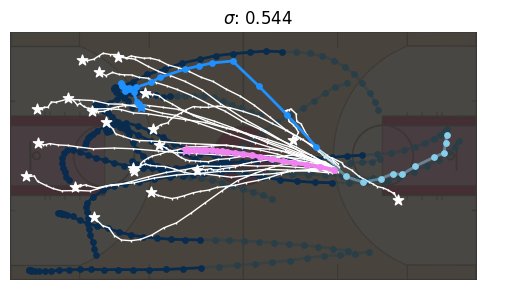

In [7]:
idx = [[0, 0], [2, 8], [3, 0], [4, 10]]

for i in idx:
    scene = i[0]
    actor_num = i[1]

    plt.clf()

    ax = plt.axes(xlim=(Constant.X_MIN,
                        Constant.X_MAX),
                ylim=(Constant.Y_MIN,
                        Constant.Y_MAX))
    ax.axis('off')
    fig = plt.gcf()
    ax.grid(False)  # Remove grid


    idx = scene*11 + actor_num

    colorteam1 = 'dodgerblue'
    colorteam2 = 'dodgerblue'
    colorball = 'dodgerblue'
    colorteam1_pre = 'skyblue'
    colorteam2_pre = 'skyblue'
    colorball_pre = 'skyblue'




    traj_pred = prediction[idx]
    traj_mean = mean[idx]
    # background players
    for actor_num_other in range(11):
        zorder = 5
        if actor_num_other==actor_num:
            zorder = 105
        traj_curr_ = traj[scene, actor_num_other].numpy()
        if actor_num_other < 5:
            color = colorteam1
            color_pre = colorteam1_pre
        elif actor_num_other < 10:
            color = colorteam2
            color_pre = colorteam2_pre
        else:
            color_pre = colorball_pre
            color = colorball
        for i in range(30):
            points = [(traj_curr_[i,0],traj_curr_[i,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.scatter(x, y, color=color_pre,s=15,alpha=1, zorder=zorder)
            else:
                if actor_num_other==actor_num and i==29:
                    plt.scatter(x, y, color=color,s=60, marker='*', alpha=1, zorder=zorder)
                
                plt.scatter(x, y, color=color, s=15,alpha=1, zorder=zorder)

        for i in range(29):
            points = [(traj_curr_[i,0],traj_curr_[i,1]),(traj_curr_[i+1,0],traj_curr_[i+1,1])]
            (x, y) = zip(*points)
            if i < 10:
                plt.plot(x, y, color=color_pre,alpha=0.5,linewidth=2, zorder=zorder-1)
            else:
                plt.plot(x, y, color=color,alpha=1,linewidth=2, zorder=zorder-1)


    for i in range(20):
        plt.plot(traj_pred[i, :19, 0], traj_pred[i, :19, 1], 
                 linestyle='-', markersize=2, marker="|", alpha=1,
                 color='white',linewidth=1, zorder=101)
        plt.plot(traj_pred[i,18:, 0], traj_pred[i, 18:, 1], 
                 linestyle='-', markersize=0, marker="o", alpha=1,
                 color='white',linewidth=1, zorder=101)


    plt.scatter(traj_pred[:, -1, 0], traj_pred[:, -1, 1], 
                marker='*', 
                color='white',s=60, alpha=1, zorder=120)



    plt.plot(traj_mean[:19, 0], traj_mean[:19, 1],
             linestyle='-', markersize=4, marker="o", alpha=1,
             color='violet',linewidth=3, zorder=130)
    plt.plot(traj_mean[18:, 0], traj_mean[18:, 1],
             linestyle='-', markersize=0, marker="o", alpha=1,
             color='violet',linewidth=3, zorder=130) 
    plt.scatter(traj_mean[-1, 0], traj_mean[ -1, 1], 
                marker='*', 
                color='violet',s=60, alpha=1, zorder=130)
    
    

    plt.title('$\sigma$: {:.3f}'.format(sigma[idx, 0]))
    plt.imshow(court, zorder=0, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF,
                                        Constant.Y_MAX, Constant.Y_MIN],alpha=0.5)
    plt.imshow(mask, zorder=90, extent=[Constant.X_MIN, Constant.X_MAX - Constant.DIFF,
                                        Constant.Y_MAX, Constant.Y_MIN],alpha=0.7)
    # plt.savefig('fig3/scene_{}_agent_{}.jpg'.format(scene, actor_num), bbox_inches='tight', dpi=300)
#         print(scene)
    plt.show()
    plt.close()